<center>Guillaume Rouvin - Nossair Moaud - Mickaël Leboulanger - Loïc Vanel Mabomesi</center>

# Projet : Algorithmie Avancée

# Liste des Modifications apportées au Livrable (rattrapage Modélisation)

- Rajout d'une bibliographie scientifique 
- Correction des fautes d'orthographe
- Explications de l'implémentation de l'algorithme génétique, et de la résolution du CVRP

# Introduction

CeciCDP a décidé de lancer des études avancées sur la gestion des tournées de livraison. Connaissant l'ensemble des villes par lesquelles un camion de livraisons doit passer, le problème consiste à déterminer le chemin passant par chaque villes, puis de revenir à son point de départ, en minimisant le temps total du trajet du camion. 

Ce problème correspond en fait, à un problème de voyageur de commerce (*Traveling Salesman Problem* ou *TSP*) : un commerçant cherche à vendre sa marchandise à travers différentes villes, il doit planifier sa tournée pour minimiser au maximum le trajet total.

Nous avons imposé des contraintes supplémentaires sur ce problème :

- k camions sont disponibles simultanéments pour effectuer les tournées de livraisons. Des points de livraison sont attribués à chaque camion. Au final on cherche à obtenir non plus le temps total, mais la date de retour du dernier camion au dépot. Cette contrainte fait évoluer le problème d'un TSP à un VRP (*Vehicle Routing Problem*).

- Les camions ont une capacité maximales (en 3D) occupée par les objets à livrer. Cette contrainte fait évoluer le problème d'un VRP à un CVRP (*Capacited Vehicle Routing Problem*).

Dans un premier temps nous allons modéliser les problèmes en détails, ensuite nous passerons à la résolution du CVRP.

# Modélisation
## TSP

Nous allons d'abord analyser le TSP et le faire évoluer vers notre problème final de CVRP. Cela nous permettra notamment de déterminer la complexité du CVRP. 

Les différentes villes reliées par des routes peuvent être comparées à un graphe *G = (V,E)* où *v ∈ V* correspond aux différents sommets du graphe (concrètement, les villes) et *e ∈ E* représentent les arrêtes (concrètement, les routes).
Un poids $C_{ij}$ est associé à chaque arrête (ce poids correspond au temps de parcours entre 2 villes). 

Voyager à travers les villes en minimisant le trajet total est un problème d'optimisation. La première étape est de transformer ce problème d'optimisation en problème de décision en rajoutant un seuil de temps *t* ; Est-ce que le trajet choisi passe à travers les différentes villes et permet de revenir au point de départ, tel que le temps total du trajet soit inférieur à _`t`_ ?

Déterminer un circuit qui passe par l'ensemble des sommets du graphe correspond à la recherche d'un circuit hamiltonien qui est un problème de complexité NP-Complet. Ajouter la contrainte supplémentaire où le trajet total doit être inférieur à un seuil *t* revient à faire une réduction polynomiale de la recherche d'un ciruit hamiltonien. Le TSP est donc au moins aussi difficile que la recherche d'un circuit hamiltonien, le TSP est donc au moins NP-Complet.
### Reformulation formelle 
#### Définition formelle du problème
Données :<blockquote>
Graphe Complet  G = (V,E) <br />
Ensemble de noeuds N = {0,1..., n}<br />
Ensemble d'arrêtes E = { (i, j) | i, j ∈ N ; i < j } <br />
Temps du voyage entre le noeud i et le noeud j (poids d'une arrête) $C_{ij}$<br />
</blockquote>

_Question :_ Est-ce que le trajet choisi passe à travers les différentes villes et permet de revenir au point de départ, tel que le temps total du trajet soit inférieur à _`t`_ ?

#### Formalisation mathématique
V : l'ensemble des villes </br>
$C_{ij}$ : poids du trajet entre 2 villes i et j  </br>

$x_{i,j} ∈ \mbox{{0;1}} \mbox{Variable de décision de l'algorithme}$</br></br>
$
x_{i,j} = \left\{
    \begin{array}{ll}
        \mbox{1 on choisit le chemin entre i et j}\\
        \mbox{0 le cas contraire}
    \end{array}
\right.
$

#### Fonction Objectif

Minimiser le poids du trajet total : </br>

$$min \sum_{i=1}^n \sum_{j=1}^n C_{ij}x_{ij} $$

Les sommes commencent avec n = 1, le sommet 0 correspondant toujours au dépot de véhicule.

#### Contraintes

$$\mbox{Le camion ne peut visiter qu'une et une seule fois chaque ville : } \sum_{i=1, i≠j}^n x_{ij} = 1 \mbox{pour } j=1,...,n $$
$$\mbox{Après avoir visité une ville i, le camion ne peut visiter qu'une seule ville :} \sum_{j=1, j≠i}^n x_{ij} = 1 \mbox{pour } i=1,...,n $$


<p align="center">
    Le TSP est désormais bien défini, et va nous servir de base pour modéliser le CVRP.
</p>
___________________________________________________________________________________________________________________________

## CVRP

Le CVRP (*Capacited vehicule Routing Problem* est un TSP auquel deux contraintes sont ajoutées. La première contrainte, l'ajout de k camions disponibles pour réaliser la tournée, permet de transformer le TSP en VRP (*Vehicle Routing Problem*). Déterminons d'abord la classe de complexité de VRP. Ce problème correspond simplement à réaliser *n* fois un problème TSP, ce qui correspond à une réduction plynomiale de TSP vers VRP, VRP est donc au moins aussi difficile que TSP. Il faut désormais ajouter la seconde contrainte : la capacité des camions, qui correspond à une seconde réduction polynomiale ; la solution doit être inférieure à un seuil C. CVRP est donc au moins aussi difficile que VRP, lui-même au moins aussi difficile que TSP. CVRP est donc au moins NP-Complet.

### Reformulation formelle 
#### Définition formelle du problème
<blockquote>
Graphe Complet  G = (N,E)<br />
Ensemble de sommets N = {0,1..., n}<br />
Ensemble d'arrêtes E = { (i, j) | i, j ∈ N ; i < j } <br />
Poids sur l'arrête entre les sommets i et j $C_{ij}$<br />
Poids des sommets qui corrrespond au volume de livraison, $Vol_n$</br>
Capacité d'un véhicule Q<br />
Nombre de véhicules p<br />
</blockquote>

_Question :_ Quels sont les trajets permettant à chaque véhicule de revenir à leur point de départ, en prenant en compte la capacité de chaque camion, tel que le temps du trajet soit inférieur à $t_{total}$ ?

#### Formalisation mathématique

L'ensemble des villes V </br>
Véhicule *k* </br>
Nombre de véhicules *p* </br>
Nombre de villes *n* </br>
Demande de chaque client $q_i$ </br>
Capacité d'un véhicule Q </br>

$C_{kij}$ : poids du trajet entre 2 villes i et j </br>

$
x_{ijk} = \left\{
    \begin{array}{ll}
        \mbox{1  on choisis le chemin entre i et j}\\
        \mbox{0 dans le cas contraire}
    \end{array}
\right.
$

#### Fonction Objectif

Minimiser la somme des poids des tours de chaque camion : </br>

$$min \sum_{k=1}^p \sum_{i=1}^n \sum_{j=1}^n C_{ij}x_{ijk} $$

#### Contraintes

$\mbox{Vérifier que le nombre de fois qu'un véhicule rentre dans une ville est égale au nombre de fois que le véhicule sort de la ville :} $
$$\sum_{i=1}^n x_{ijk} \sum_{i=1}^n x_{jik} \mbox{pour ∀ j ∈ } \{1,...,n\} \mbox { et pour ∀ k ∈} \{1,...,p\} \\ $$

$\mbox{Chaque ville n'est visité qu'une fois par un camion, et est quitté par le même véhicule :} $
$$\sum_{k=1}^p \sum_{i=1}^n x_{ijk} = 1   \mbox{  pour ∀ j ∈ } \{2,...,n\} \\ $$

$\mbox{Tous les véhicules doivent quitter le dépot :} $
$$\sum_{j=2}^n x_{1jk} = 1  \mbox{  pour ∀ k ∈ } \{1,...,p\} $$
$$\mbox{Avec la contrainte n°1, on est certain que tous les véhicules reviennent au dépot} \\ $$

$\mbox{Contrainte de capacté du véhicule :} $
$$\sum_{i=1}^n \sum_{j=2}^n q_jx_{ijk} ⩽ Q \mbox{  pour ∀ k ∈ } \{1,...,p\} $$

## Conclusion 
Ces différentes étapes ont permis de déterminer la complexité du problème, qui est donc NP-Difficile. Nous avons aussi vu la reformulation formelle du CVRP. Le CVRP ne peut pas être résolu dans un temps linéaire, nous allons donc implémenter un algorithme qui permettra de trouver une solution optimale. Pour cela nous utiliserons une méta-heuristique Dans notre cas nous avons choisi d'utiliser un algorithme génétique. 
<p>
___________________________________________________________________________________________________________________________
</p>


## Description de l'implémentation de l'algorithme génétique 

Pour réaliser le CVRP (Capacited Vehicle Routing Problem), nous devons appliquer la métaheuristique : Algorithme génétique afin de tendre vers une solution optimale au problème.

Comment avons-nous appliqué cet algorithme pour la résolution de notre problème ?


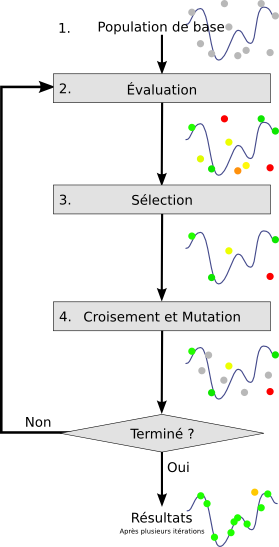

**Population de base :**
Tout d’abord, on génère autant de routes voulues qui passent par toutes les villes, chaque route créée constituera un ‘’chromosome’’. Ces routes seront ensuite découpées aléatoirement par nombre de camions disponibles pour constituer les routes de chaque camion.  

**Evaluation des chromosomes :**
Ensuite on attribue à chaque chemin parcouru par chaque camion une évaluation qu’on appellera ‘’fitness’’. Cette évaluation est la somme des poids de ces chemins. Pour chaque chromosome, le chemin le plus long , celui du dernier camion qui reviendra, sera pris en compte.
Chaque ville a une demande de volume. Pour chaque chemin, on va calculer le total des demandes de villes.

**Sélection des chromosomes :**
La phase de sélection permet de retenir les meilleurs chromosomes d’une population. 
On établit donc une liste des priorités qui va choisir les meilleurs chromosomes selon leur fitness en prenant en compte le fait que la capacité du camion doit être supérieur à la capacité totale des demandes des villes que va traverser le camion.

**Croisement et Mutation :** 
Le croisement est l’opération où les chromosomes sélectionnés s’échangent des parties de leurs chaînes. 
Ces nouveaux enfants représentent la nouvelle population.

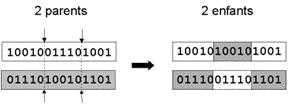


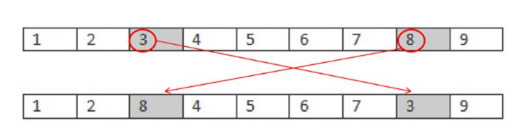

Une mutation consiste en l’échange de place entre deux villes d’un même chromosome.


Après ces deux transformations, on génère de nouveaux chromosomes aléatoires pour finir de peupler notre population et on répète tout le processus jusqu’à ce que le fitness d’un des chromosomes soit en dessous d’un seuil déterminé au préalable.

# Code 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from functools import lru_cache
import networkx as nx
import copy
import itertools
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib.pylab as plt
import seaborn as sns
import pulp
import warnings

warnings.filterwarnings("ignore")

In [2]:
class Graph:
    
    def __init__(self, Vertices=1, Edges=1, Weight=0):
        self.vertices = Vertices # Assign number of vertices to object
        
        if (Edges > Vertices and Edges <= Vertices*(Vertices-1)/2): # Maximum number of edges being one to each vertices except themselves
            self.edges = Edges # Assign edges if input edges is valid
        else:
            self.edges = Vertices - 1 # Else assign vertices as default number of edges to have a connected graph
        
        
        if (Weight != 0):
            self.weight = Weight # Asign Weight if a value has been input
        else:
            self.weight = Edges * Vertices # Else default weight is Edges * Vertices
            
        self.graph = []
        self.complete_graph = []
        
        if (Vertices > 1): # If there is more than 1 vertex, generate graph
            self.__generate_graph()
            self.__generate_complete_graph()
        
    def __generate_graph(self):
        self.graph = [[0 for column in range(self.vertices)] for row in range(self.vertices)] # Generate empty matrix of vertices size
        edges_values = [random.randint(1, 100) for _ in range(self.edges)] # Generate random values for edges
        sum_of_edges_values = sum(edges_values) # Get sum of all edges to get create proportion
        edges_values_proportional_weighted = [x / sum_of_edges_values * self.weight for x in edges_values] # Multiply each proportion with weight to create an overall graph Weight
        empty_rows, empty_cols = np.where(np.array(self.graph) == 0) # Use numpy to get list of empty_edges
        empty_edges = [x for x in zip(empty_rows, empty_cols) if x[1] > x[0]] # Create list of empty edeges for right-upper half of the matrix
        
        for x in range(0, self.vertices-1): # Generate random edges to obtain a connected graph
            y = random.choice([y[1] for y in empty_edges if y[0] == x])
            self.graph[x][y] = edges_values_proportional_weighted[x]
            empty_edges.remove((x,y))

        if (self.edges > self.vertices): # Generate random edges according to edges number
            for i in range(self.vertices-1, self.edges):
                x, y = random.choice([edge for edge in empty_edges])
                self.graph[x][y] = edges_values_proportional_weighted[i]
                empty_edges.remove((x,y))
    
                
    def __generate_complete_graph(self):
        self.complete_graph = copy.deepcopy(self.graph)
        self.__mirror_graph() # Mirror the graph for preparation to floyd_warhsall algorithm
        self.__floyd_warshall()
    
    def __mirror_graph(self):
        for x in range(self.vertices):
            for y in range(self.vertices):
                if self.complete_graph[x][y] != 0:
                    self.complete_graph[y][x] = self.complete_graph[x][y]
    
    def __floyd_warshall(self):
        distance = self.complete_graph
        
        for x in range(self.vertices): # Replace 0 on empty edges by INF
            for y in range(x+1, self.vertices):
                if (distance[x][y] == 0):
                    distance[x][y] = float('inf')
                if (distance[y][x] == 0):
                    distance[y][x] = float('inf')
                    
        for k in range(self.vertices): # Find the shortest path from i to j going through k
            for i in range(self.vertices):
                for j in range(self.vertices):
                    distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j]) # Keeps the minimum between going straight to the vertex and attempting to pass through a neighbor
                    
def show_graph(adjacency_matrix, show_weight=True, is_complete=False):
        rows, cols = np.where(adjacency_matrix != 0)
        edges = zip(rows.tolist(), cols.tolist())
        edges_weights = {x: round(adjacency_matrix[x],2) for x in zip(rows.tolist(), cols.tolist())}
        gr = nx.Graph()
        gr.add_edges_from(edges)
        
        if (not is_complete):
            position = nx.spring_layout(gr)
        else:
            position = nx.circular_layout(gr)
            
        plt.figure(figsize=(12,12))
        nx.draw_networkx(gr, pos=position, node_size=100, width=1, with_labels=show_weight)
        if (show_weight):
            nx.draw_networkx_edge_labels(gr, position , edge_labels=edges_weights)
        plt.show()

def show_solution(solutions):
    graphes = []
    
    for solution in solutions: # Generate tuples edges from vertex in solutions
        current_graph = []
        for edge in range(len(solution)-1):
            current_graph.append((solution[edge], solution[edge+1]))
        graphes.append(current_graph)
        
    graphe = nx.Graph()
    plt.figure(figsize=(12,12))
    
    cmap = plt.cm.get_cmap('hsv', (len(graphes)+1))
    for x in range(len(graphes)):
        graphe.add_edges_from(graphes[x], color=cmap(x))
        
    edges = graphe.edges()
    colors = [graphe[u][v]['color'] for u,v in edges]
    nx.draw_networkx(graphe, node_size=100, width=1, with_labels=True, edge_color=colors)
    plt.show()

def findLowerValue(graph_in, n_customer_in, n_point_in, vehicle_capacity_in):
    n_customer = n_customer_in
    n_point = n_point_in
    vehicle_capacity = vehicle_capacity_in

    graph = graph_in
    df = pd.DataFrame()
    df['demand'] = [0]+[random.randint(1,int(vehicle_capacity/6)) for i in range(0,n_point-1)]

    distances = graph.complete_graph

    demands = df['demand'].values

    # set problem
    problem = pulp.LpProblem('cvrp_mip', pulp.LpMinimize)

    # set variables
    x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
    n_vehicle = pulp.LpVariable('n_vehicle', lowBound=0, upBound=100, cat='Integer')

    # set objective function
    problem += pulp.lpSum([distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point)])

    # set constrains
    for i in range(n_point):
        problem += x[i, i] == 0

    for i in range(1, n_point):
        problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1
        problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1

    problem += pulp.lpSum(x[i, 0] for i in range(n_point)) == n_vehicle
    problem += pulp.lpSum(x[0, i] for i in range(n_point)) == n_vehicle

    # eliminate subtour
    subtours = []
    for length in range(2, n_point):
         subtours += itertools.combinations(range(1, n_point), length)

    for st in subtours:
        demand = np.sum([demands[s] for s in st])
        arcs = [x[i, j] for i, j in itertools.permutations(st, 2)]
        problem += pulp.lpSum(arcs) <= np.max([0, len(st) - np.ceil(demand / vehicle_capacity)])

    # solve problem
    status = problem.solve()

    # output status, value of objective function
#     print(status, pulp.LpStatus[status], pulp.value(problem.objective), pulp.value(n_vehicle))
    return pulp.value(problem.objective), pulp.value(n_vehicle)


In [3]:
city_num = 15 #number of cities
chromosomes = 10 #number of chromosomes
nb_truck = 3 #number of trucks
truck_max_capacity = 100 #max truck capacity
nb_iterations = 500 # number of iterations
graph_generated = Graph(city_num,50)
city_array=[0]+[random.randint(1,int(truck_max_capacity/6)) for i in range(0,city_num-1)] #each city request
rest = 0.6
rand_o = 0.4

############################Fitness############################
def fitness(list1): #calculate each path's time
    total_fitness = 0;
    for i in range (0,len(list1)-1):
        total_fitness += graph_generated.complete_graph[list1[i]][list1[i+1]]
    return total_fitness

############################Capacity############################
def capacity(list1): #calculate each path's total capacity
    total_poids_city = 0;
    for i in range (0, len(list1)):
        total_poids_city += city_array[list1[i]] 
    return total_poids_city

############################Assign############################
def assign(list_to_chunk,fitness_table): #add the first and last city + assign fitness and capacity to our path
    chunked_list2 = []
    
    for k in range(0,chromosomes*nb_truck,nb_truck):
        chunked_list2.append(list_to_chunk[k:k+nb_truck])
    
    for i in range (0,chromosomes):
        for j in range (0,nb_truck):
            chunked_list2[i][j].insert(0,0)  
            chunked_list2[i][j].append(chunked_list2[i][j][0])
            
            for k in range (0,nb_truck):
                if capacity(chunked_list2[i][j]) > 100:
                    d = fitness(chunked_list2[i][j]) + 100
                    f = capacity(chunked_list2[i][j])
                else:
                    f = capacity(chunked_list2[i][j])
                    d = fitness(chunked_list2[i][j])
            
            fitness_table.append(d)
#             print ("chromosomes ",i+1,' ',chunked_list2[i][j], ' fitness= ',d, 'capacity', f)
            chunked_list2[i][j].pop()
            chunked_list2[i][j].pop(0)
    return chunked_list2
            
############################Population############################
def generate(): #create the first population
#     print('################################ Population number : 1 ################################')
    population = []
    chunked_list = []
    fitness_table = []
    random_split_table = []
    random_split_sorted = []
    for i in range(0,chromosomes):
        population.append(random.sample(range(1, city_num), city_num-1)) #city order
        rand = random.sample(range(1,len(population[i])),nb_truck-1)
        rand.sort()
        rand.append(len(population[i]))
        chunked_list.append(population[i][0:rand[0]])
        for j in range (1, len(rand)):
            chunked_list.append(population[i][rand[j-1]:rand[j]]) #create small chunks of the city order
        random_split_table.append(rand)
        
    chunked_list2 = assign(chunked_list,fitness_table) 
    
    list_parent = []
    list_crossover = []
    pup = []
    
    for m in range(0, int(rest*chromosomes)):
        list_parent.append(select(population,fitness_table,random_split_table)[m])
        
    for j in range(0, len(list_parent)-1):
        list_crossover.append(crossover(list_parent[j][0], list_parent[j+1][0]))
    
    pup.append(list_parent[0][0])
    for l in range (1, len(list_parent)):
        pup.append(mutate(list_crossover[l-1],1))
    
    for i in range(0,chromosomes):
        random_split_sorted.append(select(population,fitness_table,random_split_table)[i][1])
    
    v = next_gen(pup)
    
    return pullout(v,0,random_split_sorted)
    
    
############################Select############################
def select(list1, list2,rand): #zip each truck path to its fitness evaluation and sort it
    list3 = []
    for i in range (0,len(list2),nb_truck):
        list3.append(max(list2[i:i+nb_truck])) #choose the max fitness of each chromosome
    zipped_pairs = zip(list1,list3,rand)
    sorted_pop = list(zipped_pairs)
    sorted_pop.sort(key=lambda a: a[1])
    table = []
    table = list(sorted_pop)
    solutions = [[x[0],x[2]] for x in table]
    return solutions


############################Crossover############################
def crossover(parent1, parent2): #perform a crossover action within two parent lists
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)
    
    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child


############################Mutate############################
def mutate(individual, mutationRate): #perform a mutation action within one list
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual


############################PullOut############################
def next_gen(new_gen): #create the 
    for i in range(0,int(rand_o*chromosomes)):
        new_gen.append(random.sample(range(1, city_num), city_num-1))
    return new_gen



def pullout(new_gen,counter,rand):
        fitness_table = []
        chunked_list3 = []
#         print ('\n################################ Population number :',counter+2,'################################')
        
        for i in range(0,chromosomes):
            chunked_list3.append(new_gen[i][0:rand[i][0]])
            for j in range(1, len(rand[i])):
                chunked_list3.append(new_gen[i][rand[i][j-1]:rand[i][j]])
        chunked_list4 = assign(chunked_list3,fitness_table)
        
        list_parent_bis = []
        list_crossover_bis = []
        pup = []
        for m in range(0, int(rest*chromosomes)):
            list_parent_bis.append(select(new_gen,fitness_table,rand)[m])
        
        for j in range(0, len(list_parent_bis)-1):
            list_crossover_bis.append(crossover(list_parent_bis[j][0], list_parent_bis[j+1][0])) 
        
        pup.append(list_parent_bis[0][0])
        for l in range (1, len(list_parent_bis)):
            pup.append(mutate(list_crossover_bis[l-1],1))
            
        if  counter < nb_iterations :
            counter = counter +1
            return pullout(next_gen(pup),counter, rand)
            
        else :
            for i in range(0,chromosomes):
                for j in range (0,nb_truck):
                    chunked_list4[i][j].insert(0,0)  
                    chunked_list4[i][j].append(chunked_list4[i][j][0])
            counter = 0
            for i in range (0,nb_truck):
                counter+=1
                d = fitness_table[i]
#                 print("\nThe number",counter,"truck's path is",[chunked_list4[0][i],"fitness = ",d])

            return chunked_list4[0], sum(fitness_table[0:nb_truck])
    
generate()
# show_graph(np.array(graph_generated.complete_graph), show_weight=True, is_complete=True)

([[0, 4, 7, 13, 3, 6, 9, 0], [0, 10, 2, 5, 0], [0, 8, 14, 1, 11, 12, 0]],
 258.3937428462418)

# Exemple

In [ ]:
city_num = 15 #number of cities
chromosomes = 10 #number of chromosomes
nb_truck = 3 #number of trucks
truck_max_capacity = 100 #max truck capacity
nb_iterations = 500 # number of iterations
graph_generated = Graph(city_num,50)
city_array=[0]+[random.randint(1,int(truck_max_capacity/6)) for i in range(0,city_num-1)] #each city request
rest = 0.6
rand_o = 0.4

show_graph(np.array(graph_generated.graph))
show_graph(np.array(graph_generated.complete_graph), show_weight=True, is_complete=True)
solution, fitness_result = generate()
show_solution(solution)
print(fitness_result)

# Plan d'expérience 

Le plan d'expérience décris les différentes variables sur lesquelles nous pouvons jouer afin de réaliser des statistiques pertinentes pour étudier l'efficacité et la fiabilité de notre algorithme de résolution.

Les différentes variables à faire varier sont :

- Le nombre d’itération d’exécution de l’algorithme entre 1 et 1000
- Le nombre de nœuds (villes) à parcourir 
- Le nombre de véhicule dont on dispose pour les livraisons
- La taille de la population
- Le pourcentage de mutation

On peut aussi effectuer différentes comparaisons :

- On compare les temps temps d'exécution de l'algorithme en fonction du nombre de noeuds
- On compare la valeur optimale minimale avec la solution issue de la borne minimale (pulp)



# Statistiques 

## Nombre de noeuds

### Graphe

### Conclusion

## Nombre d'itérations

### Graphe

In [ ]:
city_num = 15 #number of cities
chromosomes = 10 #number of chromosomes
nb_truck = 3 #number of trucks
truck_max_capacity = 100 #max truck capacity
nb_iterations = 500 # number of iterations
graph_generated = Graph(city_num,50)
city_array=[0]+[random.randint(1,int(truck_max_capacity/6)) for i in range(0,city_num-1)] #each city request
rest = 0.6
rand_o = 0.4

fitnesses_result = []
iterations_value = []

LowerValue = findLowerValue(Graph(city_num), city_num-1, city_num, truck_max_capacity)[0]

for x in range(100, 1000, 100):
    iterations_value.append(x)
    nb_iteration = x
    fitness_value = 0
    for _ in range(10):
        fitness_value += generate()[1]
    fitnesses_result.append(fitness_value/10)
    
plt.plot(iterations_value,fitnesses_result)
plt.show()
print(LowerValue)
print(min(fitnesses_result))
print(min(fitnesses_result)/LowerValue)


### Conclusion

## Pourcentage de mutations

### Graphe

### Conclusion

## Nombre de camions

### Graphe

### Conclusion

# Bibliographie Scientifique 

## Documentation écrite

Projets OR-Tools de Google pour la résolution du CVRP :
https://developers.google.com/optimization/routing/cvrp#python

Page wikipédia du TSP :
https://www.wikiwand.com/en/Travelling_salesman_problem

Publication scientifique de l'université de Denver sur le CVRP :
http://cse.ucdenver.edu/~cscialtman/complexity/Presentation.pdf

Documentation sur la recherche opérationelle :
https://www.iro.umontreal.ca/~bastin/Cours/IFT1575/IFT1575.pdf

Documentation mathématique du CVRP : 
https://how-to.aimms.com/Articles/332/332-Formulation-CVRP.html

## Documentation vidéo

Explication de Thibault Neveu sur les algorithmes génétiques :
https://www.youtube.com/watch?v=ncj_hBfRt-Y

Documentation sur le VRP et sa résolution avec un algorithme génétique :
https://www.youtube.com/watch?v=VOEOU3he8rU
